# WEEK3 HW2: WINE DATA CLASSIFICATION

## 데이터 전처리 및 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('Wine.csv', header = None)
wine.columns = ['Class', 'Alcohol', 'Malic acid','Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 데이터 분포 확인

In [3]:
data = wine.iloc[:, 1:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C19D4DCE10>,
      dtype=object)

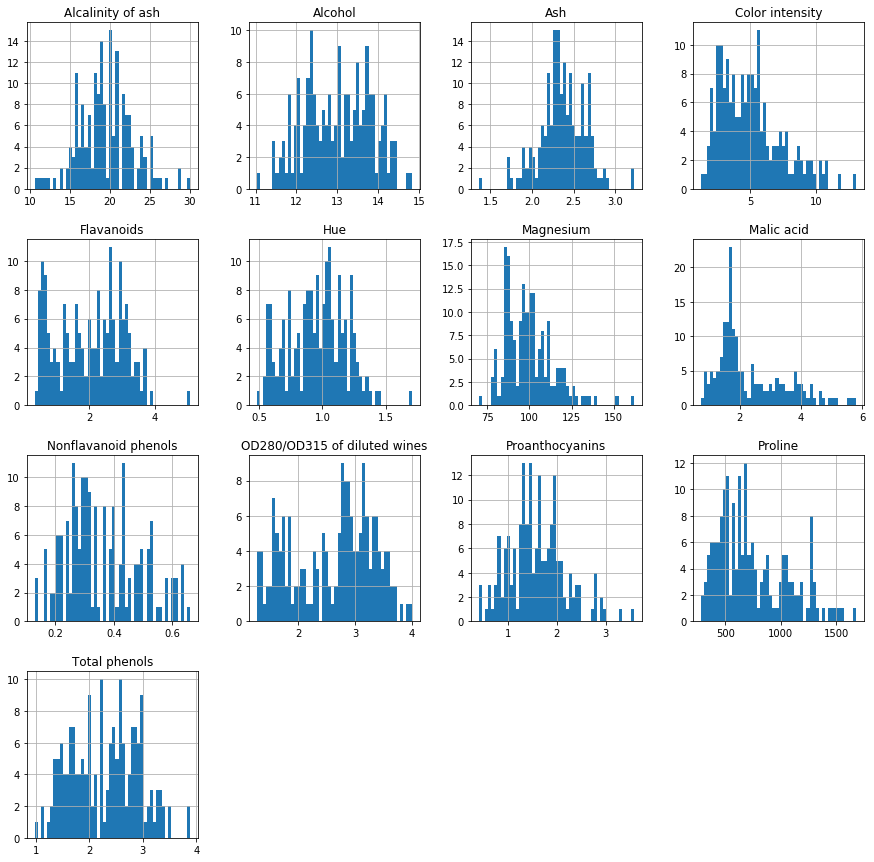

In [4]:
data.hist(bins = 50, figsize = (15, 15))

### 결측치 확인

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


=> 결측치 없음

### Feature 결정

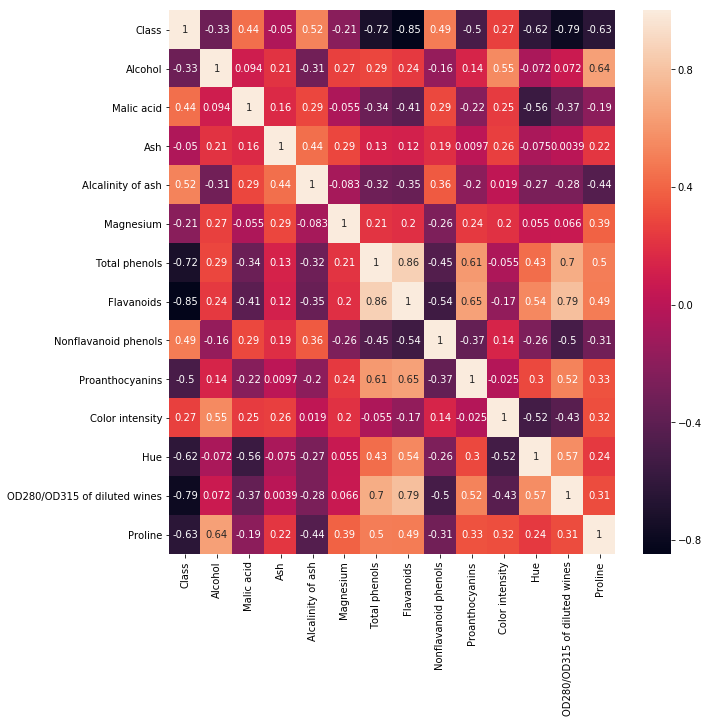

In [6]:
plt.figure(figsize = (10, 10))
sns.heatmap(wine.corr(), annot = True)

Flavanoids랑 OD280/OD315 of diluted wines 선택해야 되는 건가..?

## Train-Test set split

In [7]:
from sklearn.model_selection import train_test_split

x, y = wine[['Flavanoids', 'OD280/OD315 of diluted wines']], wine[['Class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

x_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
x_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(106, 2) (106, 1)
(72, 2) (72, 1)


## Model Fitting

### LDA/GDA